In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [41]:
df = pd.read_json(r".\All_Games_Data.json")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10336 entries, 0 to 10335
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   steamId              10336 non-null  int64  
 1   id                   10336 non-null  int64  
 2   name                 10336 non-null  object 
 3   price                10336 non-null  float64
 4   reviews              10336 non-null  int64  
 5   followers            10336 non-null  int64  
 6   reviewScore          10336 non-null  int64  
 7   copiesSold           10336 non-null  int64  
 8   revenue              10336 non-null  float64
 9   wishlists            10315 non-null  float64
 10  avgPlaytime          10336 non-null  float64
 11  tags                 10336 non-null  object 
 12  genres               10336 non-null  object 
 13  features             10336 non-null  object 
 14  developers           10336 non-null  object 
 15  publishers           10336 non-null 

In [43]:
df.head(2)

,steamId,id,name,price,reviews,followers,reviewScore,copiesSold,revenue,wishlists,...,developers,publishers,unreleased,earlyAccess,releaseDate,firstReleaseDate,publisherClass,EAReleaseDate,earlyAccessExitDate,totalRevenue
0,240,240,Counter-Strike: Source,9.99,165528,439891,96,10823784,90588048.0,383900.0,...,[Valve],[Valve],False,False,1099285200000,1099285200000,AAA,NaN,NaN,NaN
1,10,10,Counter-Strike,9.99,232214,210434,97,7006617,29440065.0,269500.0,...,[Valve],[Valve],False,False,973054800000,973054800000,AAA,NaN,NaN,NaN


In [44]:
x = df.iloc[0]
x

steamId                                                              240
id                                                                   240
name                                              Counter-Strike: Source
price                                                               9.99
reviews                                                           165528
followers                                                         439891
reviewScore                                                           96
copiesSold                                                      10823784
revenue                                                       90588048.0
wishlists                                                       383900.0
avgPlaytime                                                   123.770818
tags                   [Shooter, FPS, Action, Multiplayer, Team-Based...
genres                                                          [Action]
features               [Cross-Platform Multiplayer,

In [45]:
tags = x["tags"]
tags

['Shooter',
 'FPS',
 'Action',
 'Multiplayer',
 'Team-Based',
 'First-Person',
 'Competitive',
 'Tactical',
 'PvP',
 'eSports',
 'Military',
 'War',
 'Strategy',
 'Moddable',
 'Singleplayer',
 'Difficult',
 'Atmospheric',
 'Survival',
 'Simulation',
 'Sandbox']

In [46]:
" ".join([tag for tag in tags])

'Shooter FPS Action Multiplayer Team-Based First-Person Competitive Tactical PvP eSports Military War Strategy Moddable Singleplayer Difficult Atmospheric Survival Simulation Sandbox'

In [47]:
def tags_and_features_to_string(row):
    tags = row["tags"]
    tags = " ".join([j for j in tags])

    features = row["features"]
    features = " ".join([j for j in features])
    return tags + " " + features

In [48]:
df["string"] = df.apply(tags_and_features_to_string, axis=1)
df["string"]

0        Shooter FPS Action Multiplayer Team-Based Firs...
1        Action FPS Multiplayer Shooter Classic Team-Ba...
2        Anime MMORPG RPG Open World Action Action-Adve...
3        FPS Classic 1990's Singleplayer Sci-fi Multipl...
4        Motocross Motorbike Multiplayer Simulation Off...
                               ...                        
10331    Free to Play Massively Multiplayer Early Acces...
10332    Action Indie Pixel Graphics Local Multiplayer ...
10333    MMORPG Exploration Sandbox Open World PvP PvE ...
10334    Casual City Builder Sandbox Farming Sim Life S...
10335    Action 2.5D Platformer Fast-Paced Difficult 2D...
Name: string, Length: 10336, dtype: object

In [49]:
tfidf = TfidfVectorizer(max_features=2000)

In [50]:
tfidf_matrix = tfidf.fit_transform(list(df["string"]))

In [51]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 305010 stored elements and shape (10336, 529)>

In [52]:
print(tfidf.get_feature_names_out())
print(tfidf_matrix.toarray())

['1980s' '1990' '2d' '360' '3d' '40k' '4x' '5d' '6dof' 'abstract' 'access'
 'achievements' 'action' 'addictive' 'adventure' 'agriculture' 'aliens'
 'alternate' 'ambient' 'america' 'american' 'and' 'animation' 'anime'
 'anti' 'apocalyptic' 'app' 'arcade' 'archery' 'arena' 'artificial' 'arts'
 'assassin' 'asymmetric' 'asynchronous' 'atmospheric' 'attack' 'atv'
 'audio' 'auto' 'automation' 'automobile' 'available' 'awkward' 'base'
 'baseball' 'based' 'basketball' 'battle' 'battler' 'beat' 'beautiful'
 'bikes' 'birds' 'bit' 'blood' 'bmx' 'board' 'book' 'boomer' 'boss'
 'bowling' 'boxing' 'builder' 'building' 'bullet' 'campaign' 'capitalism'
 'captions' 'card' 'cards' 'cartoon' 'cartoony' 'casual' 'cats'
 'character' 'cheat' 'chess' 'choices' 'choose' 'cinematic' 'city' 'class'
 'classic' 'click' 'clicker' 'cloud' 'co' 'coding' 'cold' 'collectathon'
 'collectibles' 'collector' 'colony' 'colorful' 'combat' 'comedy' 'comic'
 'commentary' 'competitive' 'conspiracy' 'content' 'control' 'control

In [53]:
game2idx = pd.Series(df.index, index=df["name"])
game2idx

name
Counter-Strike: Source                  0
Counter-Strike                          1
Tower of Fantasy                        2
Half-Life                               3
MX Bikes                                4
                                    ...  
Road Dogs                           10331
STONEBOND: The Gargoyle's Domain    10332
Ethyrial: Echoes of Yore            10333
Planting Trees                      10334
Monstrosity                         10335
Length: 10336, dtype: int64

In [79]:
idx = game2idx["ELDEN RING"]
idx

100

In [80]:
query_game = tfidf_matrix[idx]
query_game

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34 stored elements and shape (1, 529)>

In [81]:
scores = cosine_similarity(query_game, tfidf_matrix)
scores

array([[0.15834179, 0.06433265, 0.25949641, ..., 0.39730631, 0.10953905,
        0.18488058]])

In [82]:
# 顯示結果
print(tfidf.get_feature_names_out())
print(query_game.toarray())

['1980s' '1990' '2d' '360' '3d' '40k' '4x' '5d' '6dof' 'abstract' 'access'
 'achievements' 'action' 'addictive' 'adventure' 'agriculture' 'aliens'
 'alternate' 'ambient' 'america' 'american' 'and' 'animation' 'anime'
 'anti' 'apocalyptic' 'app' 'arcade' 'archery' 'arena' 'artificial' 'arts'
 'assassin' 'asymmetric' 'asynchronous' 'atmospheric' 'attack' 'atv'
 'audio' 'auto' 'automation' 'automobile' 'available' 'awkward' 'base'
 'baseball' 'based' 'basketball' 'battle' 'battler' 'beat' 'beautiful'
 'bikes' 'birds' 'bit' 'blood' 'bmx' 'board' 'book' 'boomer' 'boss'
 'bowling' 'boxing' 'builder' 'building' 'bullet' 'campaign' 'capitalism'
 'captions' 'card' 'cards' 'cartoon' 'cartoony' 'casual' 'cats'
 'character' 'cheat' 'chess' 'choices' 'choose' 'cinematic' 'city' 'class'
 'classic' 'click' 'clicker' 'cloud' 'co' 'coding' 'cold' 'collectathon'
 'collectibles' 'collector' 'colony' 'colorful' 'combat' 'comedy' 'comic'
 'commentary' 'competitive' 'conspiracy' 'content' 'control' 'control

In [83]:
scores = scores.flatten()

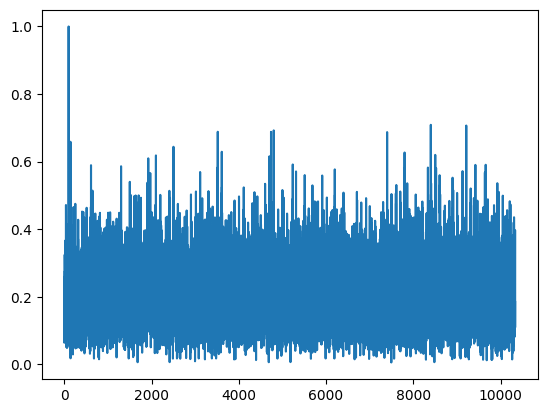

In [84]:
plt.plot(scores)

In [85]:
(-scores).argsort()

array([ 100, 8401, 9214, ..., 4687, 1681, 7496], dtype=int64)

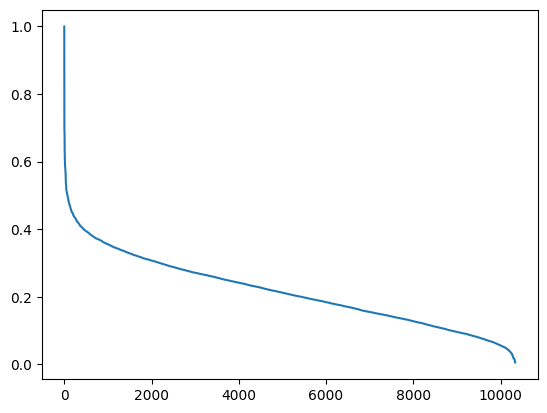

In [86]:
plt.plot(scores[(-scores).argsort()])

In [87]:
recommended_idx = (-scores).argsort()[1:6]
recommended_idx

array([8401, 9214, 4801, 3518, 4739], dtype=int64)

In [88]:
df["name"].iloc[recommended_idx]

8401                       Nioh: Complete Edition
9214                  The Last Hero of Nostalgaia
4801    STRANGER OF PARADISE FINAL FANTASY ORIGIN
3518                                  Rune Teller
4739                                Rogue Masters
Name: name, dtype: object

In [108]:
idx = game2idx["Diablo® IV"]

print(idx)

5601


In [109]:
from fuzzywuzzy import process

In [128]:
closest_match = process.extractOne("diablo IV", df["name"])
closest_match

('Diablo® IV', 100, 5601)

In [184]:
df[df["id"] == 240]["name"].to_string(index=False)

'Counter-Strike: Source'

In [195]:
def recommend(name_or_index):

    if isinstance(name_or_index, int):
        matched_game_name = df[df["id"] == name_or_index]["name"].to_string(index=False)

    else:
        # 模糊搜索 (字母大小寫皆適用)
        closest_match = process.extractOne(name_or_index, df["name"])

        # 根據輸入的遊戲名稱，對照遊戲表找出對應的索引值
        if closest_match[1] > 20:
            matched_game_name = closest_match[0]

        else:
            return "找不到輸入的遊戲名稱或ID"

    idx = game2idx[matched_game_name]

    # 確認 idx 是否有值
    if type(idx) == pd.Series:
        idx = idx.iloc[0]

    # 找出指定遊戲的matrix
    query_game = tfidf_matrix[idx]

    # 將該遊戲的matrix與其他遊戲的matrix做相似度比對
    scores = cosine_similarity(query_game, tfidf_matrix)

    # 將scores拉平
    scores = scores.flatten()

    # 得到前五名相似度最高的遊戲
    recommended_idx = (-scores).argsort()[1:6]

    # 取得推薦遊戲名稱列表和對應的索引
    recommended_games = df["name"].iloc[recommended_idx]
    recommended_indexes = recommended_idx

    # 將相似度的遊戲index丟到df裡面返回遊戲名稱
    return matched_game_name, list(zip(recommended_indexes, recommended_games))

In [198]:
def user():
    if __name__ == "__main__":

        user_input = input("請輸入遊戲名稱或steam id: ")

        try:
            user_input = int(user_input)

        except ValueError:
            user_input = user_input

        name, data = recommend(user_input)

        if data:
            match_df = pd.DataFrame(data, columns=["game_index", "game_name"])

            print(f"遊戲名稱:{name}")
            print(f"相似遊戲:\n{match_df}")

In [204]:
user()

遊戲名稱:Path of Exile
相似遊戲:
   game_index          game_name
0        1106  Drakensang Online
1         213          Superfuse
2        4503     Torchlight III
3        4701         Last Epoch
4        6219      Ashen Empires
